# 1.Introduction

In many of the data science projects, we are dealing with either a regression problem or a classification problem.

Nonetheless, regardless of whether it is a _regression_ or _classification_ problem, we can generally apply the following workflow

- Problem formulation
- Dataset Exploration
- Data Preprocessing
- Feature Selection
- Model Building
- Model Evaluation

# 2 Problem Formulation

##### Problem Formulation: Formulate a data science problem
Movie makers used to care about the box office for films in the past. However, today it is not as straightforward as the early days when movies would only screen in theaters. Television rights, video-on-demand, and streaming services are increasingly important sources of income for movie studios today.The public can be fickle, and the industry is in flux. Thus, popularity is one of the major factor used to determine a movie success.

Consequently it is important to understand what drives popularity and develop a sound method to be able to predict the popularity of a movie. 

The popularity of a movie given by TMDB is subject to many different factors, thus we have chosen to use weighted rating as our metric as it removes user bias. 

weighted rating (𝑊𝑅)=(𝑣/(𝑣+𝑚))𝑅+(𝑚/(𝑣+𝑚))𝐶

The variable we want to predict is weighted rating, and there are quite some explanatory variables including budget,genres, released date and etc. In the following sections, we begin with cleansing and pre-processing the data followed by quick exploration of the dataset to determine the independent variables.

Problem Statement: Given the data of the top 1000 movies from each year for the past 3 years, how would you derive a relationship between the popularity of the movie and its other statistics? Which variables are most strongly correlated to popularity?

# 3 Dataset Exploration

# Practical Motivation: Predict the popularity of a movie

In [1]:
# For reading txt
import ast
# For data exploration, etc.
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
# For data acquisition
import requests as rq
# For machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample Collection: Get the list of movies from 2020-2018

Get the list of movies from 2020-2018

In [2]:
#read instruction to access The Movie Database (TMDB) API https://developers.themoviedb.org/3/getting-started/introduction
api_key = ''
yr=2020
data_list=[]

for i in range(3):
    for x in range(0, 50):
        data_list.extend(rq.get('https://api.themoviedb.org/3/discover/movie?api_key='
                                +api_key+'&language=en-US&sort_by=popularity.desc&include_adult=true&include_video=false&page='
                                +str(x+1)+'&primary_release_year='+str(yr-i)).json()['results'])

print('List obtained successfully :)')
print('{:d} movies obtained.'.format(len(data_list)))

List obtained successfully :)
3000 movies obtained.


Get list of movie details (TMDb)

In [3]:
count = 0
movies = []
kw_list = []

for x in range(3000):
    movie = rq.get('https://api.themoviedb.org/3/movie/'+str(data_list[x]['id'])
                   +'?api_key='+api_key+'&language=en-US')
    if movie.status_code==200:
        movies.append(movie.json())
        movies[-1].update(rq.get('https://api.themoviedb.org/3/movie/'+str(data_list[x]['id'])
                                 +'/credits?api_key='+api_key+'&language=en-US').json())
        kw_list.append(data_list[x]['original_title'])

f = open('datafile.txt', 'w', encoding = 'utf-8')
f.write('[')
f.close()
f = open('datafile.txt', 'a', encoding = 'utf-8')
for x in movies:
    count+=1
    f.write(str(x))
    if(count!=3000):
        f.write(', ')
f.write(']')
f.close()

# Data Preparation: Clean up the data

Here we will create our main dataframe, and process it.  
This entails cleaning up any completely irrelevant data, converting certain data types into more useful forms, and synthesizing any derivative variables from the data available.  
The goal is to obtain an easily readable dataset that we can analyse and train a model on.

In [4]:
# Obtain dataframe
f=open("datafile.txt", "r", encoding="utf-8")
data=ast.literal_eval(f.read())
f.close()

data=pd.DataFrame(data)
data

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,/9xeEGUZjgiKlI69jwIOi0hjKUIk.jpg,None,0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",https://www.warnerbros.com/movies/mortal-komba...,664767,tt9580138,en,Mortal Kombat Legends: Scorpion's Revenge,...,80.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,Mortal Kombat Legends: Scorpion's Revenge,False,8.4,858,"[{'adult': False, 'gender': 2, 'id': 939345, '...","[{'adult': False, 'gender': 0, 'id': 57257, 'k..."
1,False,/z8TvnEVRenMSTemxYZwLGqFofgF.jpg,None,60000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.monsterhunter.movie,458576,tt6475714,en,Monster Hunter,...,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"Behind our world, there is another.",Monster Hunter,False,7.1,1495,"[{'adult': False, 'gender': 1, 'id': 63, 'know...","[{'adult': False, 'gender': 2, 'id': 4014, 'kn..."
2,False,/srYya1ZlI97Au4jUYAktDe3avyA.jpg,"{'id': 468552, 'name': 'Wonder Woman Collectio...",200000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.warnerbros.com/movies/wonder-woman...,464052,tt7126948,en,Wonder Woman 1984,...,151.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A new era of wonder begins.,Wonder Woman 1984,False,6.8,4912,"[{'adult': False, 'gender': 1, 'id': 90633, 'k...","[{'adult': False, 'gender': 1, 'id': 1113, 'kn..."
3,False,/fRrpOILyXuWaWLmqF7kXeMVwITQ.jpg,"{'id': 730166, 'name': 'Black Water Collection...",0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",,522444,tt7978672,en,Black Water: Abyss,...,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Descend into fear,Black Water: Abyss,False,5.0,208,"[{'adult': False, 'gender': 1, 'id': 136347, '...","[{'adult': False, 'gender': 2, 'id': 9000, 'kn..."
4,False,/aMFl4wOPhJ7NVua6SgU9zIJvFSx.jpg,None,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",,755812,tt12816348,fr,"Miraculous World: New York, United HeroeZ",...,55.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NEW CITY. SAME DUTY.,"Miraculous World: New York, United HeroeZ",False,8.4,642,"[{'adult': False, 'gender': 0, 'id': 1762588, ...","[{'adult': False, 'gender': 2, 'id': 1163095, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,False,/pA7catYkY33XU9IMtJO8MYgC0tC.jpg,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",https://www.tinkerthemovie.com/,562334,tt3833682,en,Tinker',...,97.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,Tinker',False,5.5,11,"[{'adult': False, 'gender': 2, 'id': 59671, 'k...","[{'adult': False, 'gender': 0, 'id': 239759, '..."
2995,False,/z26E8i9Zw9QaPAyfRND5sU2Qrr1.jpg,None,688960,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",,500006,tt7959216,no,Utøya 22. juli,...,92.0,"[{'english_name': 'Norwegian', 'iso_639_1': 'n...",Released,The day that changed us forever,Utøya: July 22,False,7.3,211,"[{'adult': False, 'gender': 1, 'id': 1964703, ...","[{'adult': False, 'gender': 2, 'id': 6760, 'kn..."
2996,False,/iey1QyHkcQ3l8okxv9GN6vcSGAl.jpg,None,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.halecountyfilm.com,490785,tt6634646,en,"Hale County This Morning, This Evening",...,76.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,"Hale County This Morning, This Evening",False,6.2,44,"[{'adult': False, 'gender': 0, 'id': 2225144, ...","[{'adult': False, 'gender': 2, 'id': 2047, 'kn..."
2997,False,/SWIas3mWxuvfGeJG3EqgpWTMaJ.jpg,None,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.seedscreations.com/seedshome,507498,tt3895908,en,Seeds,...,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A STORY OF TEMPTATION AND MONSTERS.,Seeds,False,5.0,8,"[{'adult': False, 'gender': 2, 'id': 1163266, ...","[{'adult': False, 'gender': 2, 'id': 138798, '...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2999 non-null   bool   
 1   backdrop_path          2894 non-null   object 
 2   belongs_to_collection  326 non-null    object 
 3   budget                 2999 non-null   int64  
 4   genres                 2999 non-null   object 
 5   homepage               2978 non-null   object 
 6   id                     2999 non-null   int64  
 7   imdb_id                2940 non-null   object 
 8   original_language      2999 non-null   object 
 9   original_title         2999 non-null   object 
 10  overview               2999 non-null   object 
 11  popularity             2999 non-null   float64
 12  poster_path            2997 non-null   object 
 13  production_companies   2999 non-null   object 
 14  production_countries   2999 non-null   object 
 15  rele

## Understand the data
Following is the summary table on some variables:

| Serial Number      | Variable    | Description    |
| :------------- | :----------: | -----------: |
|  3 | Budget  | Movie budget(in US dollars)    |
|  4 | genres| Movie style |
|  5 | homepage | A link to the homepage of the movie.|
|  6 | id |This is infact the movie_id as in the first dataset. |
|  8 | original_language  | The original language of a movie    |
|  9 | original_title| The original title is usually the title of the original version of the film when it is first officially released locally.|
|  10 | overview  | Overviews should describe the plot of the movie.  |
|  11 | popularity | popularity |
|  13 | production_companies  | list of production companies   |
|  14 | production_countries| list of production countries |
|  15 | release_date     | release time   |
|  16 | revenue | box office income(in US dollars)|
|  17 | runtime  | Duration of the movie in minutes.  |
|  18 | spoken_languages  | Only the languages spoken in the original version. |
|  19 | status  | "Released" or "Rumored".  |
|  20 | tagline    | A movie tagline is usually a short promotional text used on the poster.   |
|  23 | vote_average | Average rating|
|  24 | vote_count | Rating |





We will clean the data using the following steps:
Get rid of backdrop_path, original_title, id, imdb_id, overview, poster_path, status, video.  
Convert belongs_to_collection, tagline, homepage to boolean.  
Add weighted rating.  
Add a profit column, remove rows with 0 profit under the assumption that they have 0 budget and revenue i.e. insufficient data.  
Convert release_date to datetime64.  
Add genre columns based on no of unique genres.  
Rearrange columns.

In [6]:
# Get rid of backdrop_path, original_title, id, imdb_id, overview, poster_path, status, video
cleaned_data=data.drop(columns=['backdrop_path', 'original_title', 'id', 'imdb_id', 'overview', 'poster_path', 'status',
                                'video'])

# Convert belongs_to_collection, tagline, homepage to boolean
cleaned_data['belongs_to_collection']=data['belongs_to_collection'].astype('bool')
cleaned_data['tagline']=data['tagline'].astype('bool')
cleaned_data['homepage']=data['homepage'].astype('bool')

# Add weighted rating
# wr = v/(v+m) * R + m/(v+m) * C 
# v is the number of votes for the movie v = vote_count
# R is the average rating of the movie r = vote_average
# C is the mean vote across the whole report
# m is the minimum votes required to be listed in the chart, which in this case functions as an arbitrary weighting for the
# significance of the number of votes. We have set it to be the 60th percentile.
C=(cleaned_data.vote_average*cleaned_data.vote_count).sum(axis = 0)/cleaned_data.vote_count.sum(axis = 0)
M=cleaned_data.vote_count.quantile(0.6)

wr = (cleaned_data['vote_count']/(cleaned_data['vote_count']+M)*cleaned_data['vote_average']+M/(cleaned_data['vote_count']+M)*C)
cleaned_data['weighted_rating'] = wr

# Add a profit column, remove rows with 0 profit under the assumption that they have 0 budget and revenue i.e. insufficient data
cleaned_data['profit']=data['revenue']-data['budget']
for x in range(len(cleaned_data['profit'])):
    if cleaned_data['profit'][x]==0 and cleaned_data['budget'][x]==0:
        cleaned_data.drop(index=x, inplace=True)
cleaned_data.reset_index(drop=True, inplace=True)

# Convert release_date to datetime64
cleaned_data['release_date']=pd.to_datetime(cleaned_data['release_date'])

# Add genre columns based on no of unique genres
genre_list=[]
for x in cleaned_data['genres']:
    for y in x:
        if y['name'] not in genre_list:
            genre_list.append(y['name'])

for no in range(len(genre_list)):
    genre=[]
    for x in cleaned_data['genres']:
        genre_test=False
        for y in x:
            if genre_list[no]==y['name']:
                genre_test=True
                genre.append(genre_test)
                break
        if not genre_test:
            genre.append(genre_test)
    cleaned_data[genre_list[no]]=genre
cleaned_data=cleaned_data.drop(columns=['genres'])

# Rearrange columns
cleaned_data=cleaned_data[['adult', 'belongs_to_collection', 'homepage', 'tagline', 'title', 'budget', 'revenue', 'profit',
                           'popularity', 'weighted_rating', 'vote_average', 'vote_count', 'runtime', 'release_date',
                           'original_language', 'spoken_languages', 'production_companies', 'production_countries', 'cast',
                           'crew', 'Fantasy', 'Action', 'Adventure', 'Family', 'Animation', 'Comedy', 'Science Fiction',
                           'Drama', 'Music', 'Crime', 'Thriller', 'Romance', 'Horror', 'Mystery', 'Western', 'War', 'History',
                           'Documentary', 'TV Movie']]

cleaned_data

,adult,belongs_to_collection,homepage,tagline,title,budget,revenue,profit,popularity,weighted_rating,...,Crime,Thriller,Romance,Horror,Mystery,Western,War,History,Documentary,TV Movie
0,False,False,True,True,Monster Hunter,60000000,25814306,-34185694,968.736,7.089574,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,Wonder Woman 1984,200000000,165160000,-34840000,820.610,6.804714,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,True,The Croods: A New Age,65000000,135076090,70076090,587.137,7.466382,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,Jiu Jitsu,23000000,99924,-22900076,497.113,5.680866,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,Breach,0,39328,39328,499.798,5.237071,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,False,False,False,False,Sara's Notebook,1000000,0,-1000000,9.312,6.564824,...,False,True,False,False,False,False,False,False,False,False
858,False,False,True,True,Lords of Chaos,0,365353,365353,8.649,6.684031,...,False,True,False,True,False,False,False,False,False,False
859,False,False,False,True,Sanju,21918618,67414985,45496367,8.598,7.225365,...,False,False,False,False,False,False,False,False,False,False
860,False,False,False,True,Utøya: July 22,688960,0,-688960,8.573,7.172608,...,False,False,False,False,False,False,False,True,False,False


The dataset contains a total of  870 rows,  39 columns.

Our intuition tells us that any measure of weighted rating is likely to be affected somewhat by factors such as profit, movie budget, total revenue generated by the movie, release date, run time of the movie, or the genres associated with it.

# 4 Statistical Description and Exploratory Analysis

In [7]:
pd.set_option('display.max_columns', 100)
print(cleaned_data.dtypes)
print()
print(cleaned_data.describe())
print()
print(cleaned_data.select_dtypes(include=['bool']).describe())

adult                              bool
belongs_to_collection              bool
homepage                           bool
tagline                            bool
title                            object
budget                            int64
revenue                           int64
profit                            int64
popularity                      float64
weighted_rating                 float64
vote_average                    float64
vote_count                        int64
runtime                         float64
release_date             datetime64[ns]
original_language                object
spoken_languages                 object
production_companies             object
production_countries             object
cast                             object
crew                             object
Fantasy                            bool
Action                             bool
Adventure                          bool
Family                             bool
Animation                          bool


### Numerical Variables

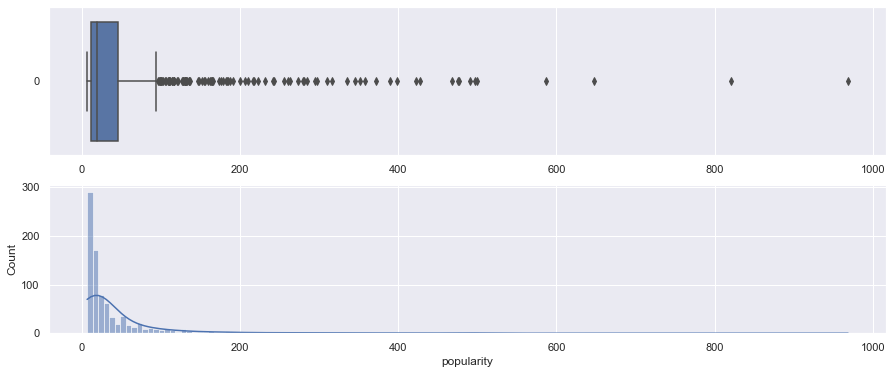

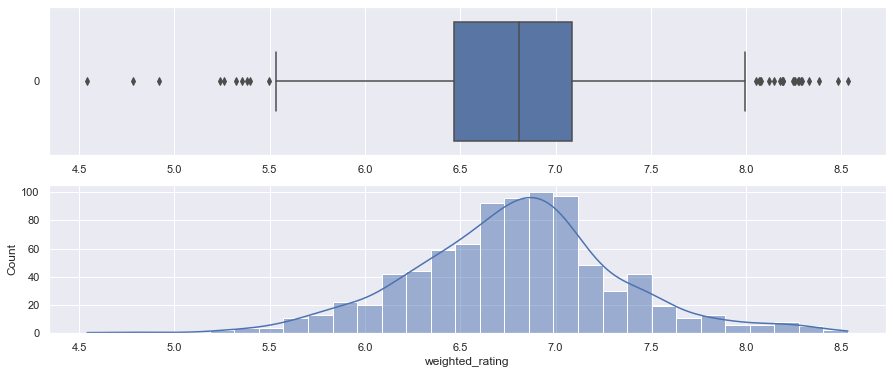

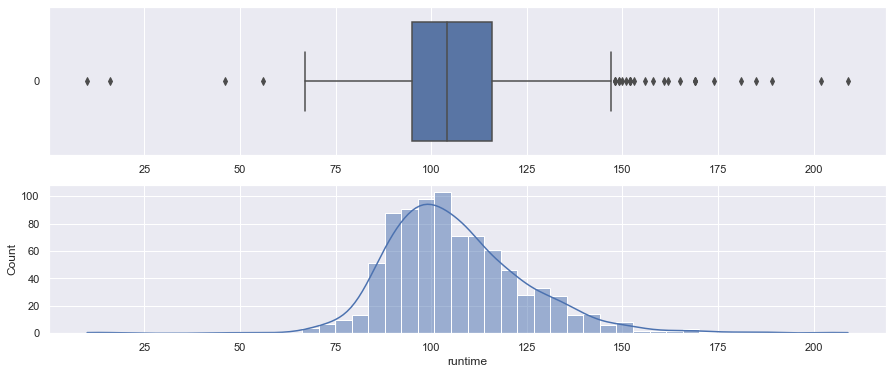

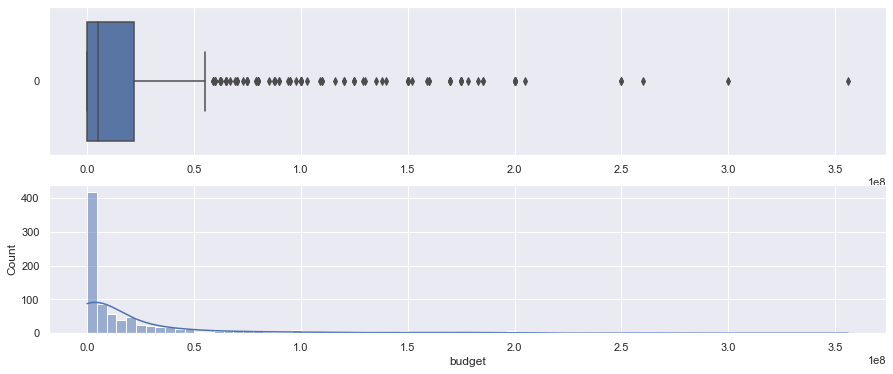

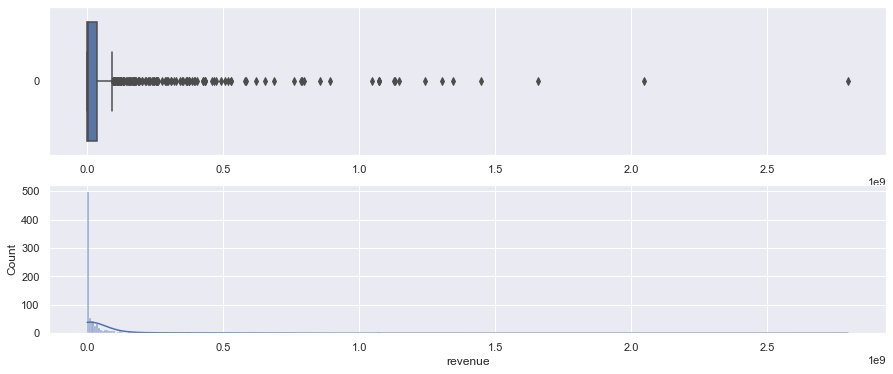

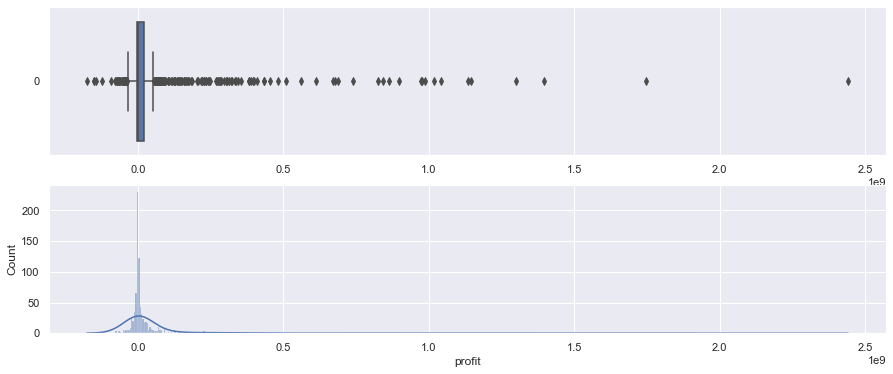

In [8]:
plot=['popularity', 'weighted_rating', 'runtime', 'budget', 'revenue', 'profit']
for x in plot:
    fig, ax=plt.subplots(2, 1, figsize=(15, 6))
    sb.boxplot(data=cleaned_data[x], orient='h', ax=ax[0])
    sb.histplot(data=cleaned_data[x], ax=ax[1], kde=True)
    plt.show()

Popularity has an extreme positive skew.
Weighted rating, and run time are roughly normally distributed.
Budget and revenue have an extreme positive skew.
Profit appears to be roughly normally distributed, but with an extreme positive skew.

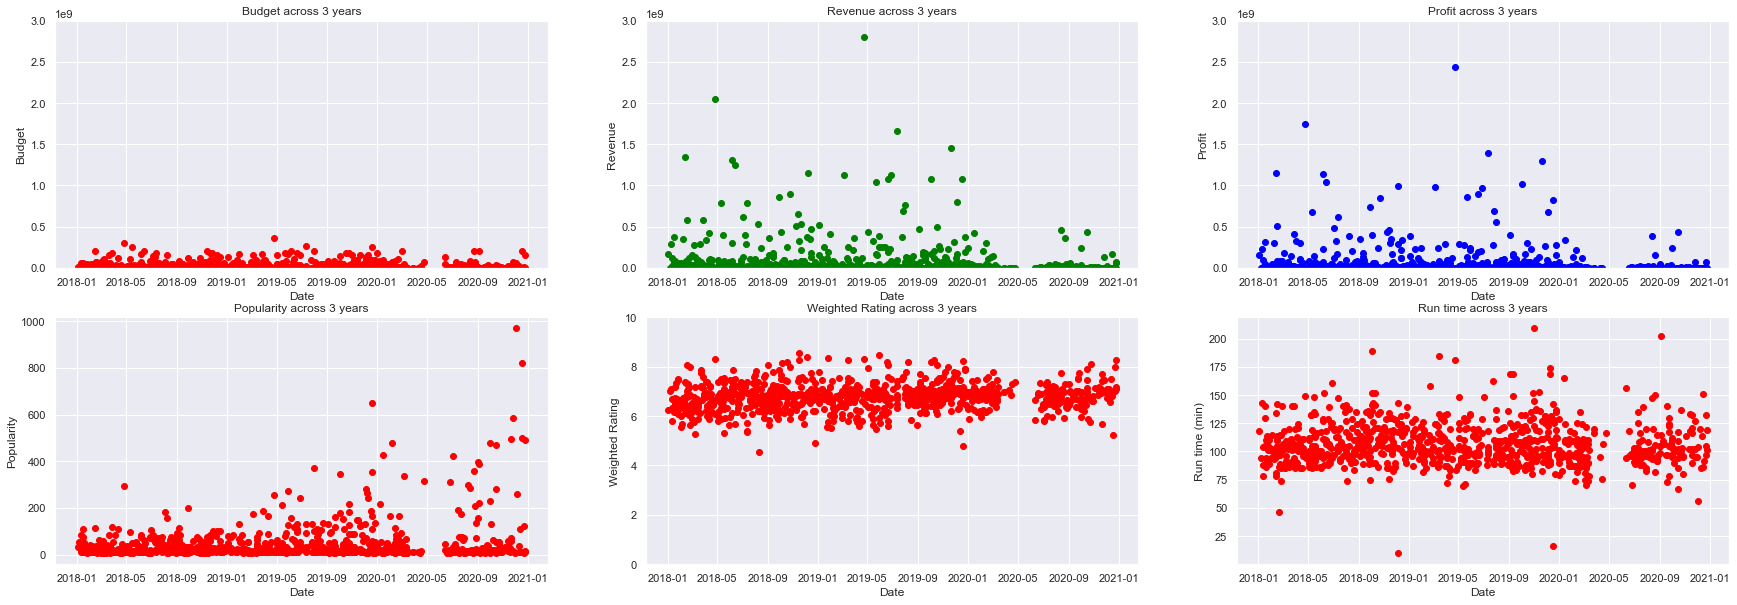

In [9]:
# Create figure and plot space
fig, ax=plt.subplots(2, 3, figsize=(30, 10))

# Add x-axis and y-axis
ax[0, 0].scatter(cleaned_data['release_date'],
        cleaned_data['budget'],
        color='red')

ax[0, 1].scatter(cleaned_data['release_date'],
        cleaned_data['revenue'],
        color='green')

ax[0, 2].scatter(cleaned_data['release_date'],
        cleaned_data['profit'],
        color='blue')

ax[1, 0].scatter(cleaned_data['release_date'],
        cleaned_data['popularity'],
        color='red')

ax[1, 1].scatter(cleaned_data['release_date'],
        cleaned_data['weighted_rating'],
        color='red')

ax[1, 2].scatter(cleaned_data['release_date'],
        cleaned_data['runtime'],
        color='red')

# Set title and labels for axes
ax[0, 0].set(xlabel='Date',
       ylabel='Budget',
       title='Budget across 3 years', ylim=(0, 3e9))

ax[0, 1].set(xlabel='Date',
       ylabel='Revenue',
       title='Revenue across 3 years', ylim=(0, 3e9))

ax[0, 2].set(xlabel='Date',
       ylabel='Profit',
       title='Profit across 3 years', ylim=(0, 3e9))

ax[1, 0].set(xlabel='Date',
       ylabel='Popularity',
       title='Popularity across 3 years')

ax[1, 1].set(xlabel='Date',
       ylabel='Weighted Rating',
       title='Weighted Rating across 3 years', ylim=(0, 10))

ax[1, 2].set(xlabel='Date',
       ylabel='Run time (min)',
       title='Run time across 3 years')

plt.show()

We can see here that budget is actually significantly smaller in magnitude compared to revenue, so the scatterplot of profit will actually closely resemble the scatterplot of revenue over the years, as budget accounts for a relatively small proportion of profit.  
Popularity appeared to increase in variance, with more extreme values over the years, while weighted rating seemed largely unaffected.  
Generally no clear trend seemed to emerge over time.

# Pattern Recognition and Analytic Visualisation

Now let's see whether any of these factors are correlated to weighted rating.

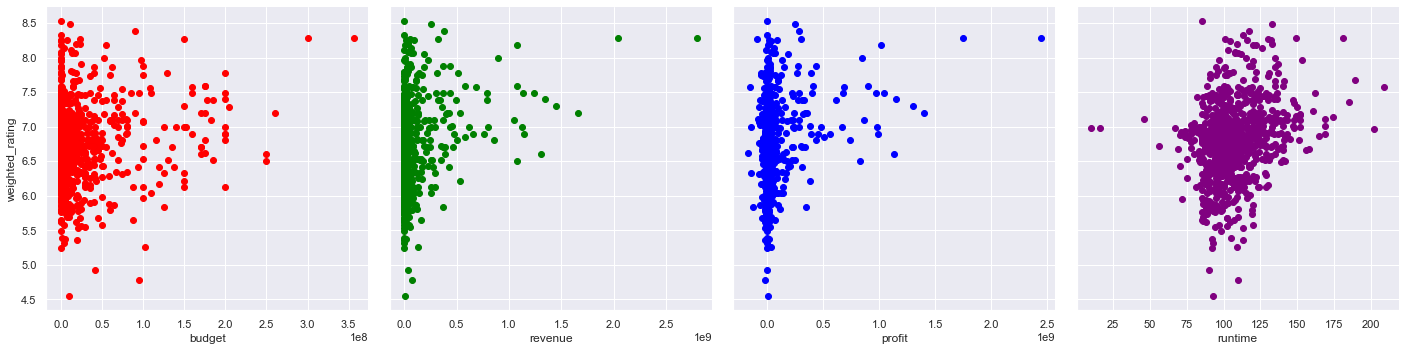

In [10]:
colors = iter(['red', 'green', 'blue', 'purple'])
def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)
sb.PairGrid(data=cleaned_data[['weighted_rating', 'runtime', 'budget', 'revenue', 'profit']],
            x_vars=['budget', 'revenue', 'profit', 'runtime'], y_vars=['weighted_rating'],
            height=5).map_offdiag(my_scatter)
plt.show()

Our budget appears to have a weak correlation with weighted rating.

Revenue appears to have a weak positive correlation with weighted rating.

Profit, being largely composed of revenue, follows a similar trend.

The run time of a movie appears to have a slight correlation with its weighted rating, if we ignore the outliers with very low runtime (These are likely to be short films).

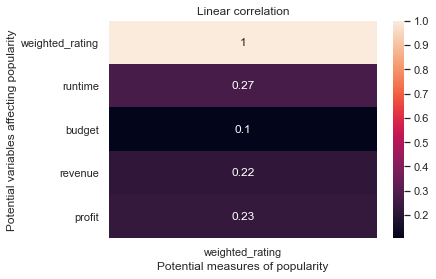

In [11]:
sb.heatmap(cleaned_data[['weighted_rating', 'runtime', 'budget', 'revenue', 'profit']]
           .corr()[['weighted_rating']], annot = True).set(xlabel='Potential measures of popularity',
                                                                         ylabel='Potential variables affecting popularity',
                                                                         title='Linear correlation')
plt.show()

#### Selection of variables
The heatmap of our correlation matrix appears to support our observations on the jointplots. Profit is derived from revenue minus budget.
Thus, given that profit, revenue, and budget are likely correlated to each other, we will be selecting profit out of the 3 as our independent variable for predicting the weighted rating of a movie, as it seems to have the best result. 
The run time of a movie also appears relatively promising here, so we will be performing multi-variate regression with runtime and profit.

But what about the genres of a movie? Let's take a look at whether they appear to affect the weighted rating of a movie.

## Categorical Variable

## Genres

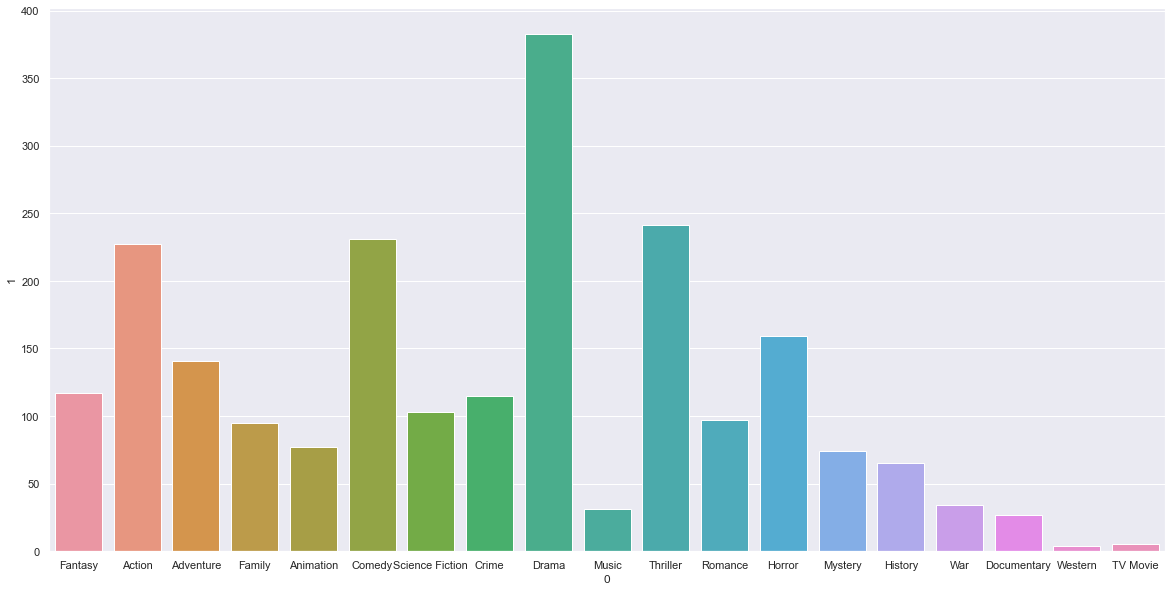

In [12]:
genre_counts=[]
for x in genre_list:
    genre_counts.append((x, cleaned_data[x].value_counts()[True]))
genre_counts=pd.DataFrame(genre_counts)
genre_counts
fig, ax=plt.subplots(figsize=(20, 10))
sb.barplot(data=genre_counts, x=0, y=1)
plt.show()

Base on the bar graph, 'Western' and 'TV Movie' are the least frequently occurring genres, while 'Drama' is the most frequently occuring genre.

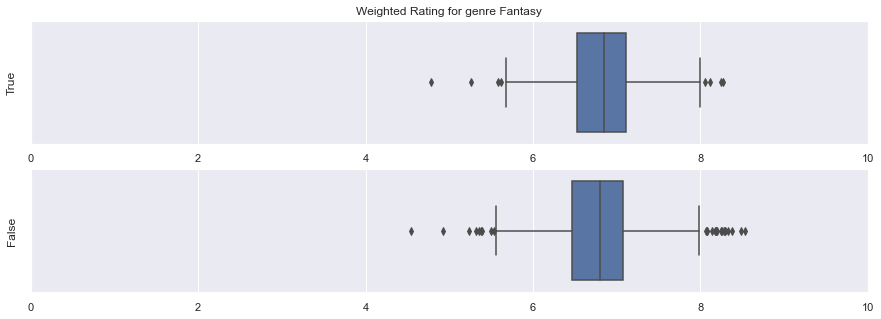

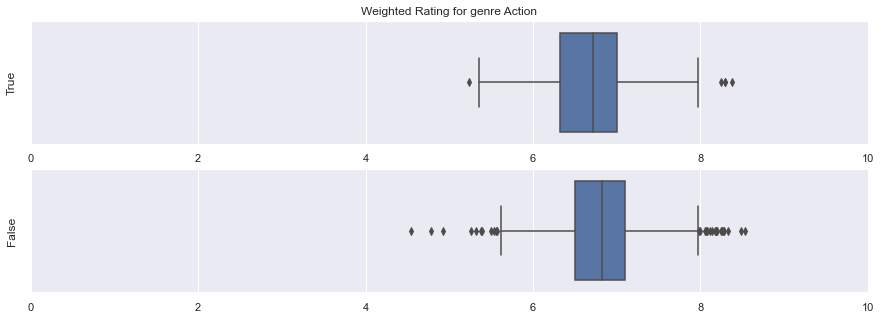

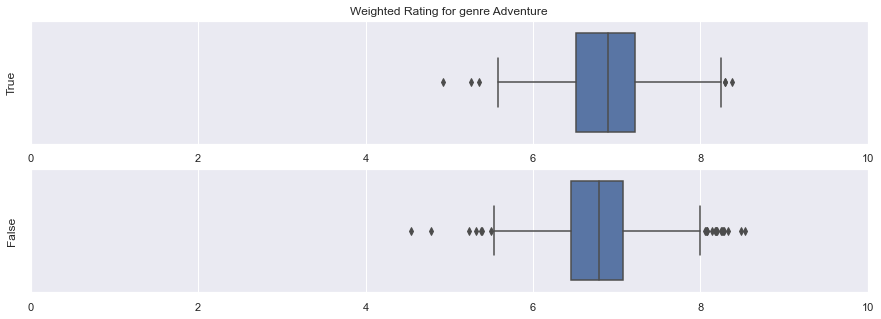

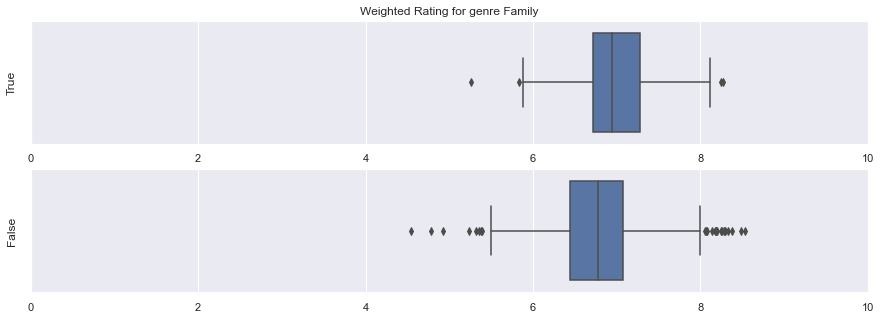

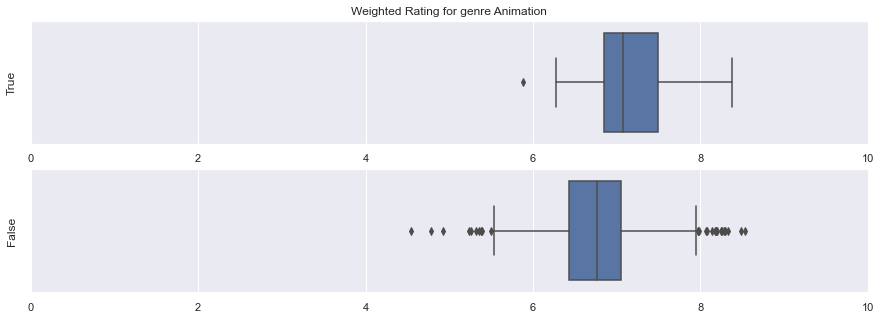

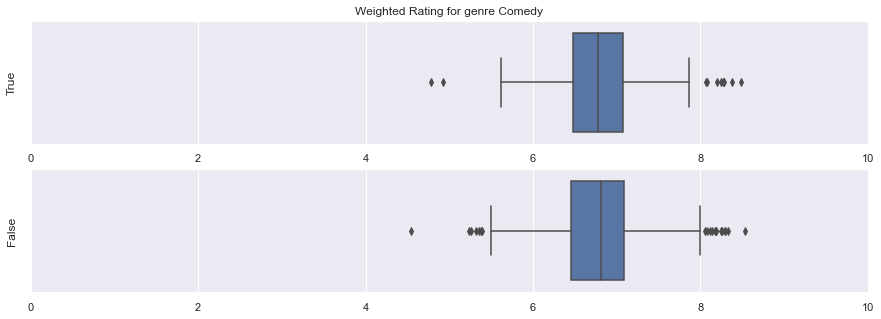

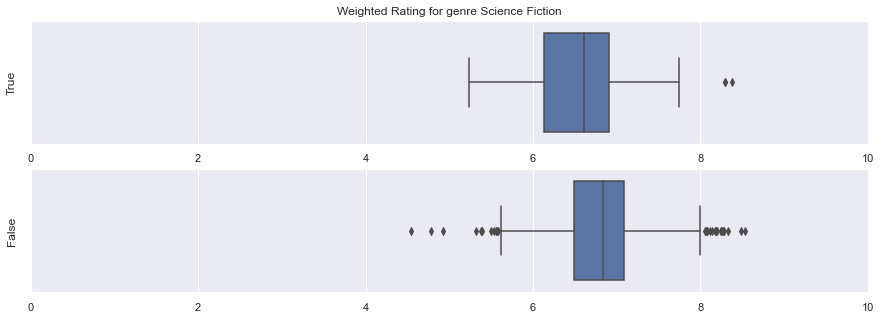

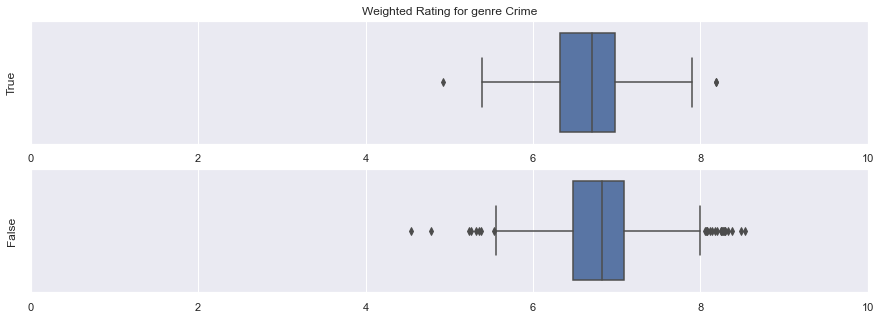

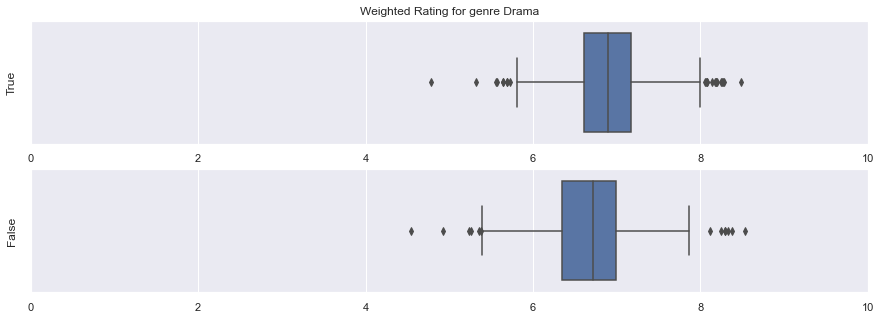

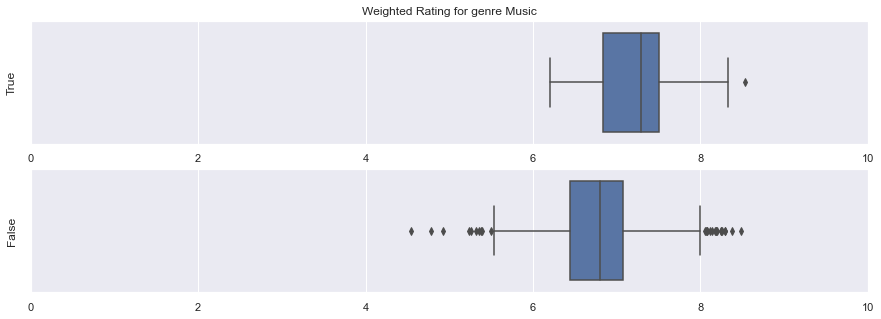

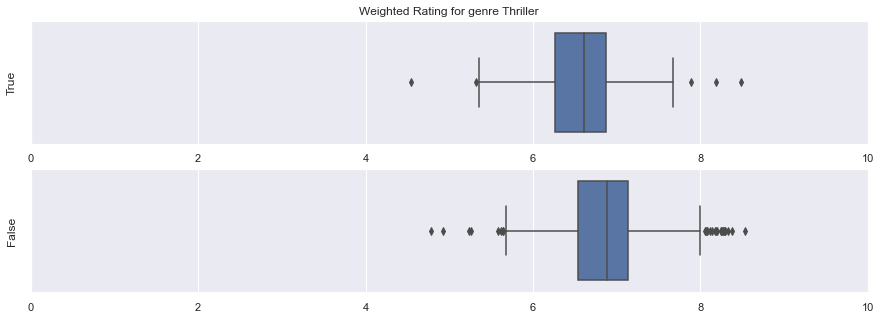

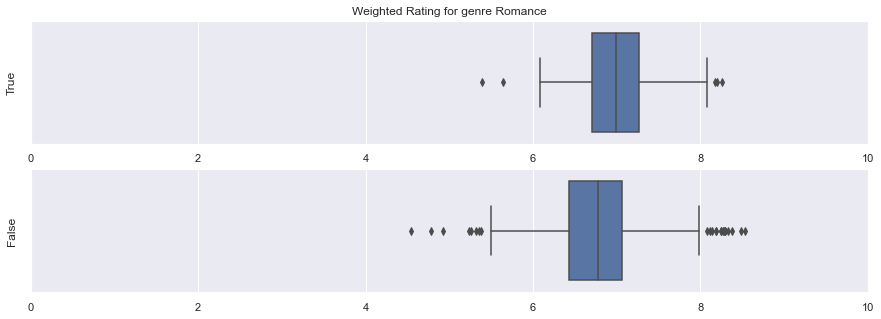

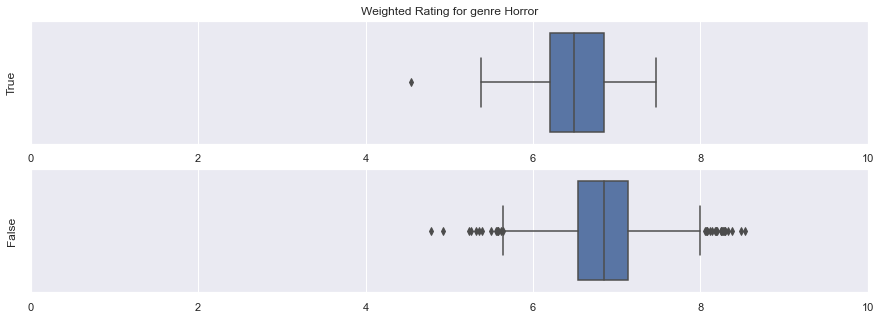

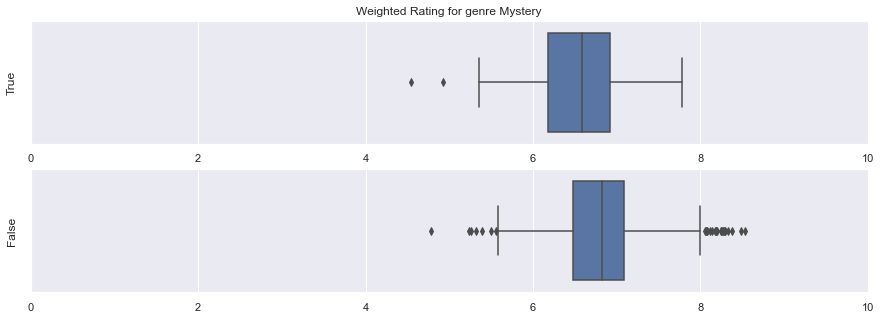

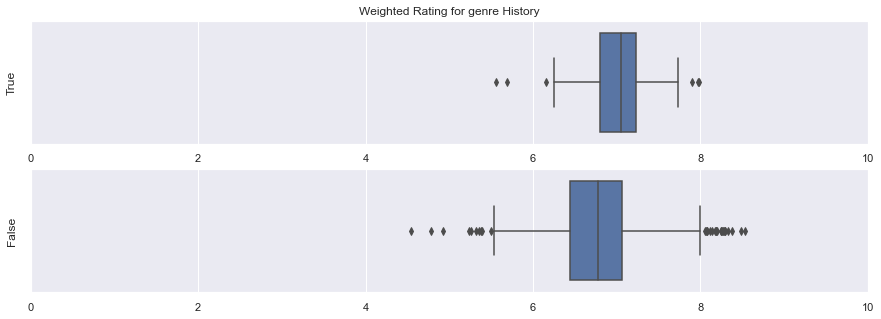

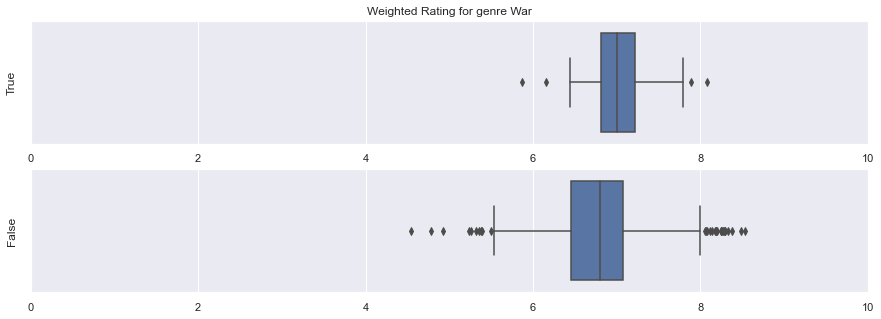

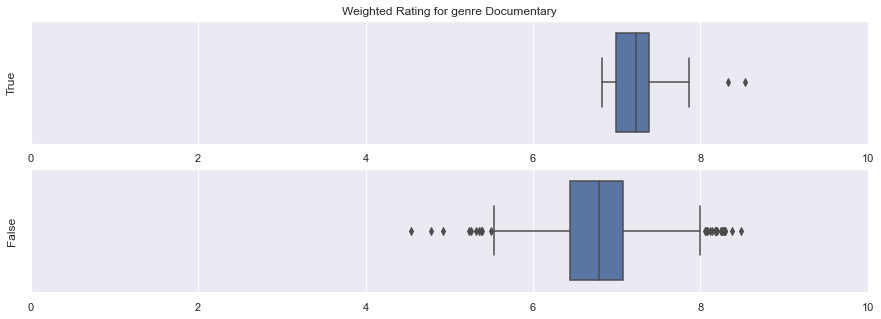

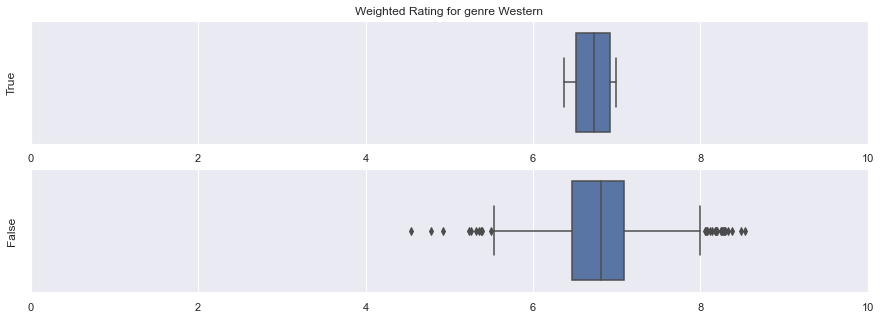

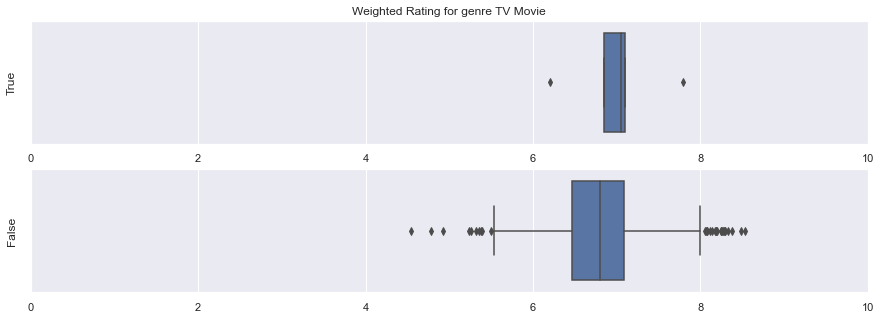

In [13]:
for x in genre_list:
    fig, ax=plt.subplots(2, 1, figsize=(15, 5))
    sb.boxplot(data=cleaned_data[['weighted_rating']][cleaned_data[x]==1], orient = 'h', ax = ax[0])
    ax[0].set(yticklabels=[], ylabel='True', title='Weighted Rating for genre '+x)
    ax[0].set_xlim((0, 10))
    sb.boxplot(data = cleaned_data[['weighted_rating']][cleaned_data[x]==0], orient = 'h', ax = ax[1])
    ax[1].set(yticklabels=[], ylabel='False')
    ax[1].set_xlim((0, 10))
    plt.show()

# 6 Machine Learning and Algorithmic Optimisation

Now let's try to perform multivariate linear regression using profit, runtime, and the genres as our independent variables. We have converted the genres of each movie into a set of dummy variables to help perform regression on.

In [14]:
# Further clean our dataset
cleaner_data=cleaned_data[['weighted_rating', 'budget', 'revenue', 'profit', 'runtime', 'Fantasy', 'Action',
                           'Adventure', 'Family', 'Animation', 'Comedy', 'Science Fiction', 'Drama', 'Music', 'Crime',
                           'Thriller', 'Romance', 'Horror', 'Mystery', 'Western', 'War', 'History', 'Documentary', 'TV Movie']]

# Split predictors and response variables
predictors=['profit', 'runtime', 'Fantasy', 'Action', 'Adventure', 'Family', 'Animation', 'Comedy', 'Science Fiction', 'Drama',
            'Music', 'Crime', 'Thriller', 'Romance', 'Horror', 'Mystery', 'Western', 'War', 'History', 'Documentary',
            'TV Movie']
x=cleaner_data[predictors]
y=cleaner_data[['weighted_rating']]

# Generate train and test data
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 0.25, random_state=0)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (646, 1) (646, 21)
Test Set  : (216, 1) (216, 21)


## Weighted Rating

In [15]:
# Train model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression : b = ', linreg.intercept_)

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))

Intercept of Regression : b =  [6.03877561]
         Predictors  Coefficients
0            profit  6.393957e-10
1           runtime  6.461270e-03
2           Fantasy -1.209512e-01
3            Action -4.972321e-02
4         Adventure -3.122826e-02
5            Family  4.759220e-02
6         Animation  5.073517e-01
7            Comedy -4.471845e-02
8   Science Fiction -1.565826e-01
9             Drama  1.975850e-01
10            Music  2.460405e-01
11            Crime -5.814258e-02
12         Thriller -1.738723e-01
13          Romance  9.303875e-02
14           Horror -7.538101e-02
15          Mystery -9.518854e-02
16          Western -2.194850e-01
17              War  2.161052e-02
18          History  4.788797e-02
19      Documentary  4.872081e-01
20         TV Movie  3.359482e-01


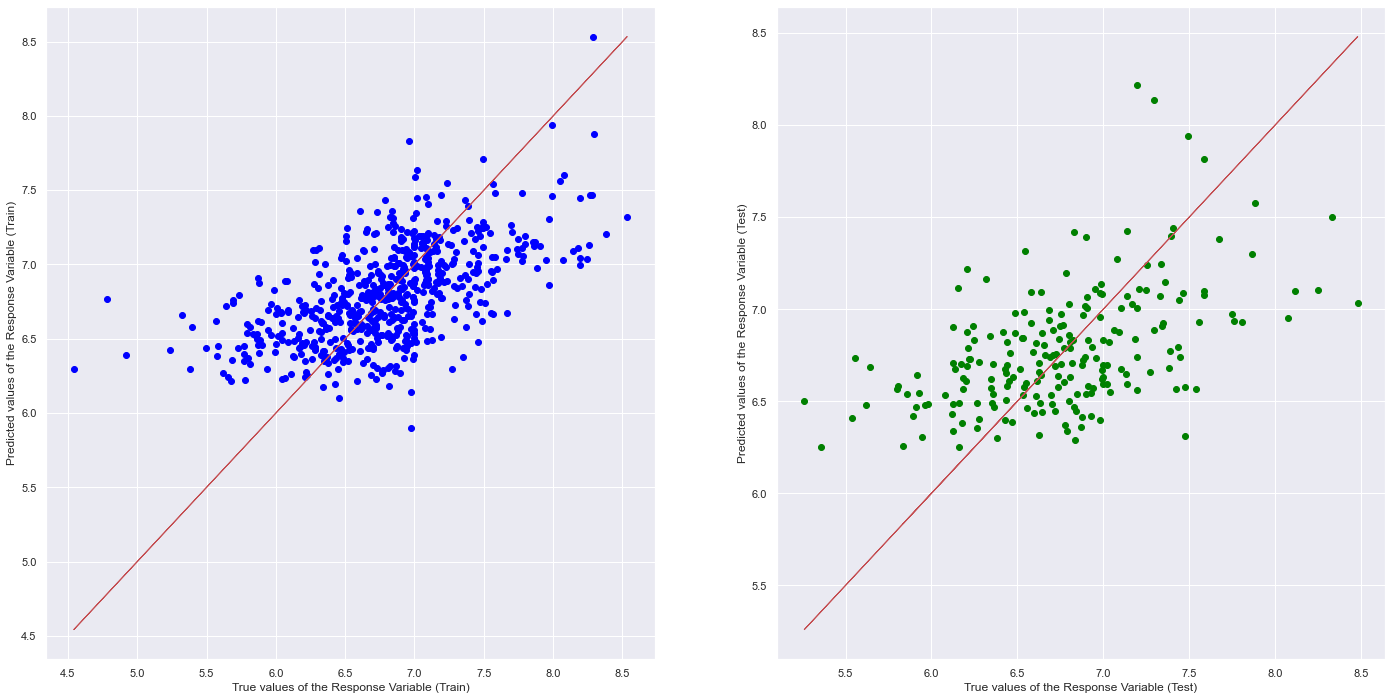

In [16]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [17]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.34233362215337415
Mean Squared Error (MSE) 	: 0.19933776388269367
Root Mean Squared Error (RMSE) 	: 0.4464725790938271

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.24683606592418927
Mean Squared Error (MSE) 	: 0.22262418362171332
Root Mean Squared Error (RMSE) 	: 0.471830672616473



As we can see, we obtained relatively similar accuracies between our train ans test datasets.
Now let's try to predict the weighted rating for a few specific movies.

In [18]:
sample = cleaned_data.sample(n=15, random_state=0)
sample

,adult,belongs_to_collection,homepage,tagline,title,budget,revenue,profit,popularity,weighted_rating,vote_average,vote_count,runtime,release_date,original_language,spoken_languages,production_companies,production_countries,cast,crew,Fantasy,Action,Adventure,Family,Animation,Comedy,Science Fiction,Drama,Music,Crime,Thriller,Romance,Horror,Mystery,Western,War,History,Documentary,TV Movie
55,False,False,True,True,Artemis Fowl,125000000,0,-125000000,46.877,5.834415,5.7,1154,94.0,2020-06-12,en,"[{'english_name': 'English', 'iso_639_1': 'en'...","[{'id': 11391, 'logo_path': None, 'name': 'Tri...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'adult': False, 'gender': 2, 'id': 1996905, ...","[{'adult': False, 'gender': 2, 'id': 380, 'kno...",True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
526,False,False,True,True,Rampage,120000000,426245950,306245950,110.602,6.414602,6.4,5219,107.0,2018-04-12,en,"[{'english_name': 'English', 'iso_639_1': 'en'...","[{'id': 73118, 'logo_path': None, 'name': 'Wri...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 5546, 'kn...",False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
569,False,False,True,True,Peppermint,25000000,48818723,23818723,53.911,6.632502,6.6,1433,102.0,2018-09-06,en,"[{'english_name': 'English', 'iso_639_1': 'en'...","[{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...","[{'adult': False, 'gender': 1, 'id': 9278, 'kn...","[{'adult': False, 'gender': 2, 'id': 68602, 'k...",False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
261,False,False,False,False,The Driver,1300000,0,-1300000,85.255,6.849161,6.5,49,97.0,2019-11-25,en,"[{'english_name': 'English', 'iso_639_1': 'en'...",[],"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'adult': False, 'gender': 2, 'id': 18702, 'k...","[{'adult': False, 'gender': 2, 'id': 65615, 'k...",False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
31,False,False,True,True,Death of Me,0,41848,41848,130.296,5.960883,4.9,130,95.0,2020-10-02,en,"[{'english_name': 'English', 'iso_639_1': 'en'...","[{'id': 1632, 'logo_path': '/cisLn1YAUuptXVBa0...","[{'iso_3166_1': 'TH', 'name': 'Thailand'}, {'i...","[{'adult': False, 'gender': 1, 'id': 21045, 'k...","[{'adult': False, 'gender': 2, 'id': 2675, 'kn...",False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
615,False,False,True,True,Bad Times at the El Royale,32000000,31882724,-117276,32.347,6.808909,6.8,2535,141.0,2018-10-04,en,"[{'english_name': 'English', 'iso_639_1': 'en'...","[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'adult': False, 'gender': 2, 'id': 1229, 'kn...","[{'adult': False, 'gender': 2, 'id': 3285, 'kn...",False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False
204,False,False,False,False,Ashfall,17700000,61321941,43621941,647.321,6.737824,6.6,234,128.0,2019-12-19,ko,"[{'english_name': 'English', 'iso_639_1': 'en'...","[{'id': 103323, 'logo_path': '/6erRU1smLcM353N...","[{'iso_3166_1': 'KR', 'name': 'South Korea'}]","[{'adult': False, 'gender': 2, 'id': 25002, 'k...","[{'adult': False, 'gender': 2, 'id': 24993, 'k...",False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
425,False,False,True,True,Never Grow Old,12000000,0,-12000000,13.884,6.557673,6.1,124,101.0,2019-03-15,en,"[{'english_name': 'English', 'iso_639_1': 'en'...","[{'id': 17821, 'logo_path': '/bZp3beVId2zVhxrx...","[{'iso_3166_1': 'BE', 'name': 'Belgium'}, {'is...","[{'adult': False, 'gender': 2, 'id': 46593, 'k...",

In [19]:
# Extract Predictors for Prediction
x_pred = pd.DataFrame(sample[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(x_pred)
y_pred

array([[6.25531742],
       [6.87622066],
       [6.48945924],
       [6.5395834 ],
       [6.48205351],
       [6.82012129],
       [6.6388861 ],
       [6.46420619],
       [6.79064914],
       [6.30073237],
       [6.874885  ],
       [6.4218251 ],
       [6.94341084],
       [6.77016328],
       [6.60656525]])

In [20]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ['Pred_weighted_rating'], index = sample.index)
movie_acc = pd.concat([sample[['title', 'weighted_rating']], y_pred], axis = 1)

y_errs = 100 * abs(movie_acc['weighted_rating'] - movie_acc['Pred_weighted_rating']) / movie_acc['weighted_rating']
y_errs = pd.DataFrame(y_errs, columns = ["Error(%)"], index = sample.index)
movie_acc = pd.concat([movie_acc, y_errs], axis = 1)

movie_acc

,title,weighted_rating,Pred_weighted_rating,Error(%)
55,Artemis Fowl,5.834415,6.255317,7.214139
526,Rampage,6.414602,6.876221,7.196369
569,Peppermint,6.632502,6.489459,2.156687
261,The Driver,6.849161,6.539583,4.519941
31,Death of Me,5.960883,6.482054,8.743177
615,Bad Times at the El Royale,6.808909,6.820121,0.164677
204,Ashfall,6.737824,6.638886,1.468395
425,Never Grow Old,6.557673,6.464206,1.425298
674,I Kill Giants,6.211523,6.790649,9.323419
686,Unfriended: Dark Web,6.382847,6.300732,1.286495


#### Prediction Interval

The confidence on Prediction depends on the Distribution and Deviation of the Errors in Prediction.    
We obtain the Mean Squared Error on the Train Set while fitting/training the Linear Regression Model.    

The Standard Error of Prediction may be estimated as $StdE = \sqrt{\frac{n}{n-2} MSE}$ from the Train Set.

In [21]:
MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 0.2
Pred Standard Error (SE) 	: 0.45


In Prediction, we assume a Gaussian (Normal) Distribution for Predictions Errors.    
The `95%` Prediction Interval for any data point is given by $Prediction \pm 1.96 \times StdE$    
The `99%` Prediction Interval for any data point is given by $Prediction \pm 2.58 \times StdE$

In [22]:
y_95l = pd.DataFrame(movie_acc['Pred_weighted_rating'] - 1.96*StdE_pred).rename(columns = {'Pred_weighted_rating' : '95 Lower'})
y_95u = pd.DataFrame(movie_acc['Pred_weighted_rating'] + 1.96*StdE_pred).rename(columns = {'Pred_weighted_rating' : '95 Upper'})
y_99l = pd.DataFrame(movie_acc['Pred_weighted_rating'] - 2.58*StdE_pred).rename(columns = {'Pred_weighted_rating' : '99 Lower'})
y_99u = pd.DataFrame(movie_acc['Pred_weighted_rating'] + 2.58*StdE_pred).rename(columns = {'Pred_weighted_rating' : '99 Upper'})

movie_int = pd.concat([movie_acc, y_95l, y_95u, y_99l, y_99u], axis = 1)
movie_int

,title,weighted_rating,Pred_weighted_rating,Error(%),95 Lower,95 Upper,99 Lower,99 Upper
55,Artemis Fowl,5.834415,6.255317,7.214139,5.378873,7.131761,5.101631,7.409004
526,Rampage,6.414602,6.876221,7.196369,5.999777,7.752665,5.722534,8.029907
569,Peppermint,6.632502,6.489459,2.156687,5.613015,7.365903,5.335773,7.643146
261,The Driver,6.849161,6.539583,4.519941,5.663139,7.416027,5.385897,7.693270
31,Death of Me,5.960883,6.482054,8.743177,5.605609,7.358498,5.328367,7.635740
615,Bad Times at the El Royale,6.808909,6.820121,0.164677,5.943677,7.696565,5.666435,7.973808
204,Ashfall,6.737824,6.638886,1.468395,5.762442,7.515330,5.485200,7.792573
425,Never Grow Old,6.557673,6.464206,1.425298,5.587762,7.340650,5.310520,7.617893
674,I Kill Giants,6.211523,6.790649,9.323419,5.914205,7.667093,5.636963,7.944336
686,Unfriended: Dark Web,6.382847,6.300732,1.286495,5.424288,7.177176,5.147046,7.454419


In [23]:
print('Average error(%):', movie_int['Error(%)'].sum()/len(movie_int))
print('Highest error(%):', movie_int['Error(%)'].max())
print('99% confidence interval:', 2.58*StdE_pred*2)

Average error(%): 4.707656255011882
Highest error(%): 10.730378095388843
99% confidence interval: 2.307373061876841


## 7 Model Evaluation

Although the explained variance of our model is quite low at less than 0.5, the error of our model in predicted the weighted rating is relatively small, with the largest deviation in the small sample above being 12.03% and the average error being 4.63%.  
The 99% confidence interval for our estimate is 2.35, which we consider to be an adequately narrow margin.  
The low value of the explained variance in our model may be attributed to the fact that weighted rating is dependent on multiple factors, such as competition with other popular movies that were released at a similar time. Global events such as covid-19 may have also introduced a lot of variance into the data, which we lack information on. As such, our model likely lacks a lot of context for the weighted rating of the movies, which could be used to improve on our model.

Overall our model is still a good predictor of weighted rating of a movie. 

# 8 Extra

Compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.Term frequency, it is the relative frequency of a word in a document and is given as (term instances / total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term). The overall importance of each word to the documents in which they appear is equal to TF * IDF.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
def get_tfidf(df: pd.DataFrame):
    tfidf = TfidfVectorizer(stop_words='english')
    df.overview = df.overview.fillna('')
    tfidf_matrix = tfidf.fit_transform(df.overview)
    return tfidf_matrix


tfidf_matrix = get_tfidf(data)
tfidf_matrix.shape

(2999, 14521)

In [25]:
from sklearn.metrics.pairwise import linear_kernel
def compute_cosine_similarity(matrix):
    cosine_simi = linear_kernel(matrix, matrix)
    return cosine_simi


cosine_sim = compute_cosine_similarity(tfidf_matrix)
print(cosine_sim)

[[1.         0.02933236 0.         ... 0.         0.01288072 0.        ]
 [0.02933236 1.         0.06427707 ... 0.         0.01614    0.0187806 ]
 [0.         0.06427707 1.         ... 0.         0.         0.02464716]
 ...
 [0.         0.         0.         ... 1.         0.         0.05645577]
 [0.01288072 0.01614    0.         ... 0.         1.         0.01184753]
 [0.         0.0187806  0.02464716 ... 0.05645577 0.01184753 1.        ]]


In [26]:
# Construct a reverse map of indices and movie titles & drop duplicate indexes
indices = pd.Series(data.index, index=data.title).drop_duplicates()


print(len(cosine_sim))
print(len(indices))
#tuple(enumerate(cosine_sim[indices['Soul']]))

2999
2999


In [27]:
data['title']

0       Mortal Kombat Legends: Scorpion's Revenge
1                                  Monster Hunter
2                               Wonder Woman 1984
3                              Black Water: Abyss
4       Miraculous World: New York, United HeroeZ
                          ...                    
2994                                      Tinker'
2995                               Utøya: July 22
2996       Hale County This Morning, This Evening
2997                                        Seeds
2998                             The VelociPastor
Name: title, Length: 2999, dtype: object

In [28]:
C=(data.vote_average*data.vote_count).sum(axis = 0)/data.vote_count.sum(axis = 0)
M=data.vote_count.quantile(0.6)

wr = (data['vote_count']/(data['vote_count']+M)*data['vote_average']+M/(data['vote_count']+M)*C)
data['weighted_rating'] = wr

In [29]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(df, title, cosine_sim=cosine_sim, top=10):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = tuple(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the `top` most similar movies
    sim_scores = sim_scores[1:top + 1]

    # Get the movie indices (only if the indexes are well sorted in continuous manner
    # eg. 1, 2, 3, 4 and not like 1, 3, 4 since the index given by enumerate is used
    # to get movie index)
    movie_indices = [i[0] for i in sim_scores]
    average = ((sum(df['weighted_rating'].iloc[movie_indices]))/10)

    # Return the top 10 most similar movies
    #result = pd.DataFrame
    return df[['title','weighted_rating']].iloc[movie_indices]#,average,df['popularity'].iloc[movie_indices]
    #return average

get_recommendations(data, "Cinderela Pop")

,title,weighted_rating
1955,The Swan Princess: Kingdom of Music,6.954387
1642,Don't Stop Me Now,6.590719
2536,Cinderella and the Secret Prince,6.889126
283,The Swan Princess: A Royal Wedding,7.059707
1196,Adventures of Aladdin,6.577746
2340,Charming,6.649028
1921,Cinderella: After Ever After,6.964103
376,The Secret Garden,6.701583
2753,The Stolen Princess: Ruslan and Ludmila,6.804693
172,Castle Freak,6.683819


The system has done a decent job of finding movies with similar plot descriptions.

Cinderella Pop is a Brazilian romantic comedy film, thus the other recomended shows are related to princess and disney.It can be a good predictor of similar movies to user who are looking for movies of similar plot.